# Enkripsi RSA
Enkripsi RSA menggunakan 2 kombinasi bilangan prima. Mari coba 2 bilangan prima "rahasia" (5, 11), lalu lihat bagaimana kita bisa menggunakannya untuk enkripsi dan dekripsi pesan rahasia secara aman.


# Mekanisme RSA

In [1]:
# Secret primes are used as seeds to generate the public key
p, q = 7, 3

# Factorization is difficult so it is safe to share n publicly without revealing
# p and q
n_public = p * q

Kita membutuhkan mekanisme untuk menerima pesan dari pengirim tanpa membutuhkan pertukaran informasi rahasia. Untuk mencapai ini, kita menggunakan bilangan prima untuk menghasilkan lalu mempublikasikan sebuah public key yang terdiri dari 2 angka $(e, n)$.

Pada skema RSA, indeks enkripsi $(e)$ dapat berupa bilangan apapun yang kurang dari $n$ selama bilangan tersebut coprime dengan fungsi totient Euler, $\phi =  (p-1)\times(q-1)$



In [2]:
# "Totient function" used to generate encryption keys
phi = (p-1)*(q-1)

# Public Key (e, n) used to encrypt the message
e_public = 11

# Ensure the encryption index is coprime with our totient function by checking 
# The greatest common divisor is 1 (they have no other shared factors)
def gcd(a, b):
  if (a == 0):
    return b
  return gcd(b % a, a)
assert gcd(e_public, phi) == 1

print ('Public key:', n_public, ',', e_public)

Public key: 21 , 11


## Encryption Cipher

untuk menghitung pesan Cipher, $C$, pengirim menggunakan rumus:

$C = P^e (\text{ mod }n )$

Untuk dapat menggunakan metode ini, pesan perlu untuk dipecah menjadi blok-blok yang lebih kecil dari $n$ (dalam kasus ini adalah 55).

Karena hanya ada 26 huruf pada alfabet, kita hanya mengubah pesan menjadi kumpulan bilangan dengan memberikan setiap huruf sebuah nilai berdasarkan posisi dari alfabet

In [3]:
message = 'secret'
print('Plain-text:', message)

def encrypt(message, e, n):
  encoded = [ord(letter) - 96 for letter in message]
  ciphertext = [(letter ** e) % n for letter in encoded]
  encryptedmessage = ''.join([chr(letter + 96) for letter in ciphertext])
  return str(encryptedmessage)

encryptedmessage = encrypt(message, e_public, n_public)
print('Cipher-text:', encryptedmessage)

Plain-text: secret
Cipher-text: jqliqt


## Decrypting the message

Penerima pesan akan menggunakan skema deskripsi berikut:

$D = C^d (\text{ mod }n)$

In [4]:
def decrypt(encryptedmessage, d, n):
  encryptedmessage = [ord(letter) - 96 for letter in encryptedmessage]
  plaintext = [(letter ** d) % n for letter in encryptedmessage]
  message = ''.join([chr(letter + 96) for letter in plaintext])
  return message

Dimana $ e \times d \equiv 1 \text{ mod } \phi, 0 \leq d \leq n $ 

$D = P$ supaya pesan yang terdekripsi dan pesan awal adalah sama.

Untuk mengatur ini, indeks dekripsi $d$ dikonstruksi menggunakan bilangan prima rahasia kita melalui algoritma Euler

In [5]:
def gcdExtended(a, b):

    # Base Case
    if a == 0 : 
        return b, 0, 1
            
    gcd, x1, y1 = gcdExtended(b%a, a)
    
    # Update x and y using results of recursive
    # call
    x = y1 - (b//a) * x1
    y = x1
    
    return gcd, x, y

_, _, d_private = gcdExtended(phi, e_public)
d_private %= phi

print ('Private decryption key:', d_private)

Private decryption key: 11


Ini kunci rahasia kita, kunci ini tidak akan disebarkan ke siapapun karena akan digunakan untuk dekripsi pesan yang telah dienkripsi dengan public key.


In [6]:
print('Encrypted message:', encryptedmessage)

decryptedmessage = decrypt(encryptedmessage, d_private, n_public)
print('Decrypted message:', decryptedmessage)

Encrypted message: jqliqt
Decrypted message: secret


## Vulnerability
Umpama seorang hacker dapat mencuri pesan enkripsi yang sedang dikirim


In [7]:
stolenmessage = encryptedmessage

print('Stolen message:', stolenmessage)

Stolen message: jqliqt


Pesan yang dicuri tidak mungkit dapat dimengerti, karena hacker tidak tahu $d_{private}$ dekripsi privat dibutuhkan untuk membaca pesan tersebut.

Kelemahannya adalah $n_{public}$ dan $e_{public}$ dapat diakses publik. Untuk faktorisasi $n$, dan menemukan $p$ dan $q$.

In [8]:
from sympy.ntheory import factorint
import time

start = time.time()
a,b = factorint(n_public)
end = time.time()
print('Factors:', a, ',', b)
print('time:',end-start)

Factors: 3 , 7
time: 5.412101745605469e-05


Begitu kita berhasil melakukan faktorisasi, kita dapat menghitung $\phi$ dan menghasilkan $d_{secret}$ kunci dekripsi yang dapat membuka pesan rahasia.


In [9]:
phi_stolen = (a-1)*(b-1)
_, _, d_stolen = gcdExtended(phi_stolen, e_public)
d_stolen %= phi_stolen

exposedmessage = decrypt(stolenmessage, d_stolen, n_public)
print('Exposed message:', exposedmessage)

Exposed message: secret


## Tingkat Keamanan

Lubang keamanan di atas dapat diatasi jika proses faktorisasi sangat lambat.

$55 \sim 2^6$ dan $7 \sim 2^3$ sehingga kunci enkripsi membutuhkan 9 bits untuk disimpan. Kunci yang digunakan biasanya paling sedikit 1,024 bits dan begitu banyak informasi yang harus dienkripsi bersamaan.

pada contoh berikut, setiap karakter dapat diprediksi dengan subtitusi karakter lain [simple substitution cipher](https://en.wikipedia.org/wiki/Substitution_cipher) dan sangat mudah diserang, misalnya dengan [frequency analysis](https://en.wikipedia.org/wiki/Frequency_analysis).

Memfaktorisasi 200 bit membutuhkan beberapa menit.

Faktorisasi diatas 500 bits membutuhkan jauh lebih lama dan tidak praktis

In [10]:
list_time = []
for i in range(200):
    exp = i
    integer = 2**exp +1
    print(exp, integer)

    start = time.time()
    print(factorint(integer))
    end = time.time()
    print('time:',end-start)
    list_time.append(end-start)

0 2
{2: 1}
time: 0.00018286705017089844
1 3
{3: 1}
time: 5.2928924560546875e-05
2 5
{5: 1}
time: 6.29425048828125e-05
3 9
{3: 2}
time: 5.1021575927734375e-05
4 17
{17: 1}
time: 7.486343383789062e-05
5 33
{3: 1, 11: 1}
time: 9.298324584960938e-05
6 65
{5: 1, 13: 1}
time: 0.00030803680419921875
7 129
{3: 1, 43: 1}
time: 4.315376281738281e-05
8 257
{257: 1}
time: 5.030632019042969e-05
9 513
{3: 3, 19: 1}
time: 6.723403930664062e-05
10 1025
{5: 2, 41: 1}
time: 5.91278076171875e-05
11 2049
{3: 1, 683: 1}
time: 5.316734313964844e-05
12 4097
{17: 1, 241: 1}
time: 4.315376281738281e-05
13 8193
{3: 1, 2731: 1}
time: 4.482269287109375e-05
14 16385
{5: 1, 29: 1, 113: 1}
time: 5.7220458984375e-05
15 32769
{3: 2, 11: 1, 331: 1}
time: 4.8160552978515625e-05
16 65537
{65537: 1}
time: 7.390975952148438e-05
17 131073
{3: 1, 43691: 1}
time: 6.723403930664062e-05
18 262145
{5: 1, 13: 1, 37: 1, 109: 1}
time: 4.410743713378906e-05
19 524289
{3: 1, 174763: 1}
time: 0.00010418891906738281
20 1048577
{17: 1, 

{3: 1, 415141630193: 1, 8142767081771726171: 1}
time: 2.727247714996338
104 20282409603651670423947251286017
{257: 1, 78919881726271091143763623681: 1}
time: 0.0004811286926269531
105 40564819207303340847894502572033
{3: 2, 11: 1, 43: 1, 211: 1, 281: 1, 331: 1, 5419: 1, 86171: 1, 1564921: 1, 664441: 1}
time: 0.005610942840576172
106 81129638414606681695789005144065
{5: 1, 15358129: 1, 586477649: 1, 1801439824104653: 1}
time: 0.2852480411529541
107 162259276829213363391578010288129
{3: 1, 643: 1, 84115747449047881488635567801: 1}
time: 0.0005269050598144531
108 324518553658426726783156020576257
{17: 1, 241: 1, 433: 1, 38737: 1, 33975937: 1, 138991501037953: 1}
time: 0.01610589027404785
109 649037107316853453566312041152513
{3: 1, 104124649: 1, 2077756847362348863128179: 1}
time: 0.06275510787963867
110 1298074214633706907132624082305025
{5: 2, 41: 1, 397: 1, 2113: 1, 415878438361: 1, 3630105520141: 1}
time: 0.9884088039398193
111 2596148429267413814265248164610049
{3: 2, 1777: 1, 3331: 

{5: 1, 13: 1, 37: 1, 109: 1, 246241: 1, 3618757: 1, 279073: 1, 106979941: 1, 168410989: 1, 4977454861: 1}
time: 0.7769289016723633
163 11692013098647223345629478661730264157247460343809
{3: 1, 11281292593: 1, 1023398150341859: 1, 337570547050390415041769: 1}
time: 1.8863840103149414
164 23384026197294446691258957323460528314494920687617
{17: 1, 13121: 1, 8562191377: 1, 12243864122465612155106392056552353: 1}
time: 0.6826579570770264
165 46768052394588893382517914646921056628989841375233
{3: 2, 11: 2, 67: 1, 331: 1, 683: 1, 2971: 1, 20857: 1, 48912491: 1, 415365721: 1, 2252127523412251: 1}
time: 0.08743691444396973
166 93536104789177786765035829293842113257979682750465
{5: 1, 997: 1, 13063537: 1, 209957719973: 1, 46202197673: 1, 148067197374074653: 1}
time: 0.7626159191131592
167 187072209578355573530071658587684226515959365500929
{3: 1, 62357403192785191176690552862561408838653121833643: 1}
time: 0.0008373260498046875
168 374144419156711147060143317175368453031918731001857
{97: 1, 257:

Text(0.5, 0, 'n-bit')

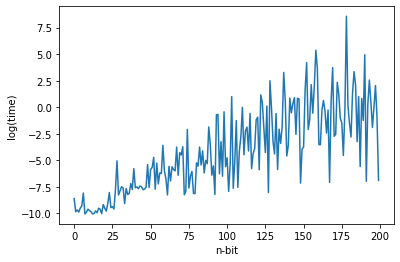

In [23]:
import numpy as np
from matplotlib import pyplot as plt
plt.plot(np.log(list_time[:200]))
plt.ylabel('log(time)')
plt.xlabel('n-bit')

Faktorisasi diatas 500 bits, memerlukan sekitar [300 triliun tahun](https://www.quintessencelabs.com/blog/breaking-rsa-encryption-update-state-art/), dimana lebih lama dari umur alam semesta (13.77 miliar tahun).

Sekalipun secara teori kita dapat memfaktorisasi kunci untuk membuka detail bank (dan informasi lainnya), proses ini tidak praktis untuk dilakukan.

Tapi sebuah komputer kuantum dapat melakukan hal ini beberapa detik saja.

## Faktorisasi Kuantum

In [25]:
from fractions import Fraction
from sympy.ntheory.continued_fraction import continued_fraction, continued_fraction_convergents

output = '011'
N = 21
a = 4
decimal = int(output, 2)  # Convert (base 2) string to decimal
phase = decimal/(2**3)  # Find corresponding eigenvalue    
frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
list_frac = list(continued_fraction_convergents(continued_fraction(frac)))
print(list_frac)
for f in list_frac:
    r = f.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r/2)-1, N), gcd(a**(r/2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True

[0, 1/2, 1/3, 3/8]
Result: r = 1
Guessed Factors: 1 and 3
*** Non-trivial factor found: 3 ***
Result: r = 2
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***
Result: r = 3
Guessed Factors: 7 and 3
*** Non-trivial factor found: 7 ***
*** Non-trivial factor found: 3 ***
Result: r = 8
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***


In [21]:
from fractions import Fraction
from sympy.ntheory.continued_fraction import continued_fraction, continued_fraction_convergents

output = '101'
N = 21
a = 4
decimal = int(output, 2)  # Convert (base 2) string to decimal
phase = decimal/(2**3)  # Find corresponding eigenvalue    
frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
list_frac = list(continued_fraction_convergents(continued_fraction(frac)))
print(list_frac)
for f in list_frac:
    r = f.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r/2)-1, N), gcd(a**(r/2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True

[0, 1, 1/2, 2/3, 5/8]
Result: r = 1
Guessed Factors: 1 and 3
*** Non-trivial factor found: 3 ***
Result: r = 1
Guessed Factors: 1 and 3
*** Non-trivial factor found: 3 ***
Result: r = 2
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***
Result: r = 3
Guessed Factors: 7 and 3
*** Non-trivial factor found: 7 ***
*** Non-trivial factor found: 3 ***
Result: r = 8
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***


In [61]:
p = 7
q = 3

## Pesan Rahasia

In [62]:
message = 'datarahasia'
print('Plain-text:', message)

encryptedmessage = encrypt(message, e_public, n_public)
print('Cipher-text:', encryptedmessage)

Plain-text: datarahasia
Cipher-text: pataiahajra


## Pesan Rahasia Terbongkar

In [63]:
phi_stolen = (p-1)*(q-1)
_, _, d_stolen = gcdExtended(phi_stolen, e_public)
d_stolen %= phi_stolen

exposedmessage = decrypt(encryptedmessage, d_stolen, n_public)
print('Exposed message:', exposedmessage)

Exposed message: datarahasia
